In [1]:
from regression_helper import * # Подгружаем функции для визуализации
import numpy as np              # Подгруджаем библиотеку NumPy

X, y = get_data()               # Загружаем данные в X и y

# Линейная функция со сдвигом

В качестве гипотезы использовалась функцияю вида $f(X) = kX$.

Такая фукнция всегда будет проходить через точку  $(0, 0)$.

Что бы этого избежать, можно довить к функции *сдвиг*.

Линейная функцию с угловым коэффициентом и сдвигом называется функция вида:

$f(X) = kX + b$

## Визуализация линейной функции с различными коэффициентами

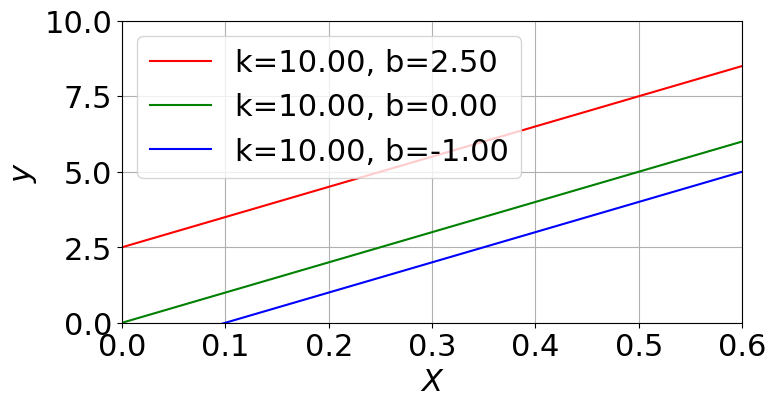

In [2]:
plot_several_linear_functions_with_bais(ks=[10, 10, 10], bs=[2.5, 0, -1])

Коэффициент $k$ отвечает за наклон функции.

Коэффициент $b$ отвечает за свиг функции по вертикали.

## Функция ошибки для линейной функции со смещением

Перепишем функцию ошибки:

$\hat{y} = f(X) = kX + b$.

$error_i(k, b) = (\hat{y_i} - y_i)^2 = ((kX_i + b) - y_i)^2$.

На всех примерах:

$Loss(k, b) = \dfrac{1}{N}\sum_{i=0}^{N}{(\hat{y_i} - y_i)^2}= \dfrac{1}{N} \sum_{i=0}^{N}{((kX_i + b) - y_i)^2} $

Можно заметить, что теперь у нас ошибка зависит не только от $k$, но и от $b$.

## Визуалиция функции ошибки

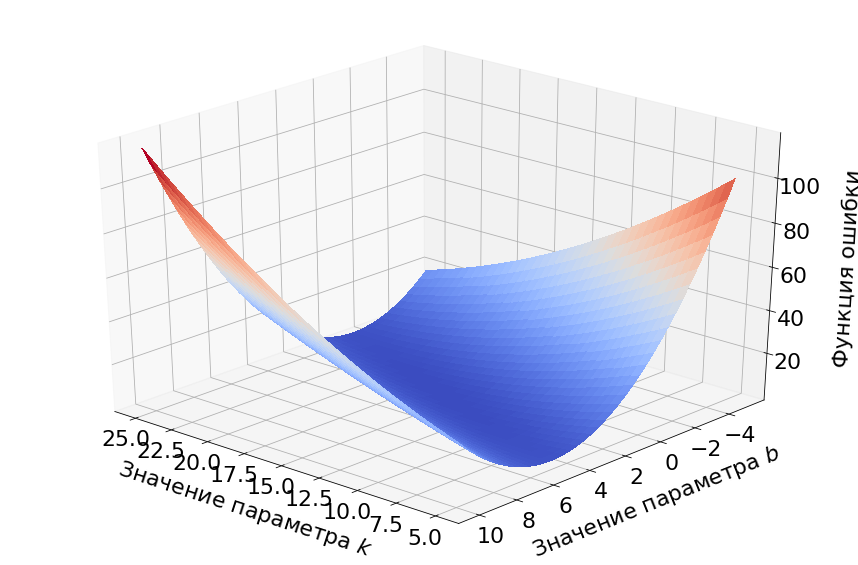

In [3]:
plot_loss_with_bias(X, y, 29, 132)

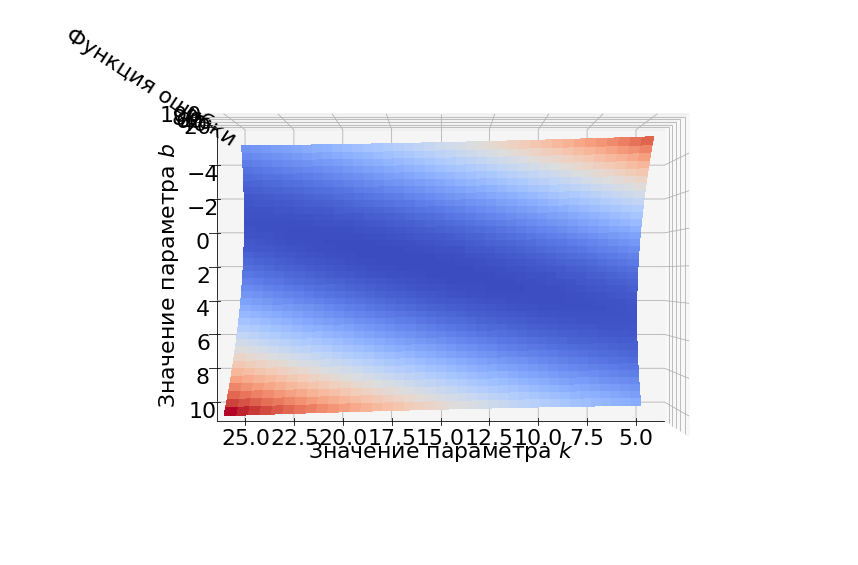

In [4]:
plot_loss_with_bias(X, y, 90, 90)

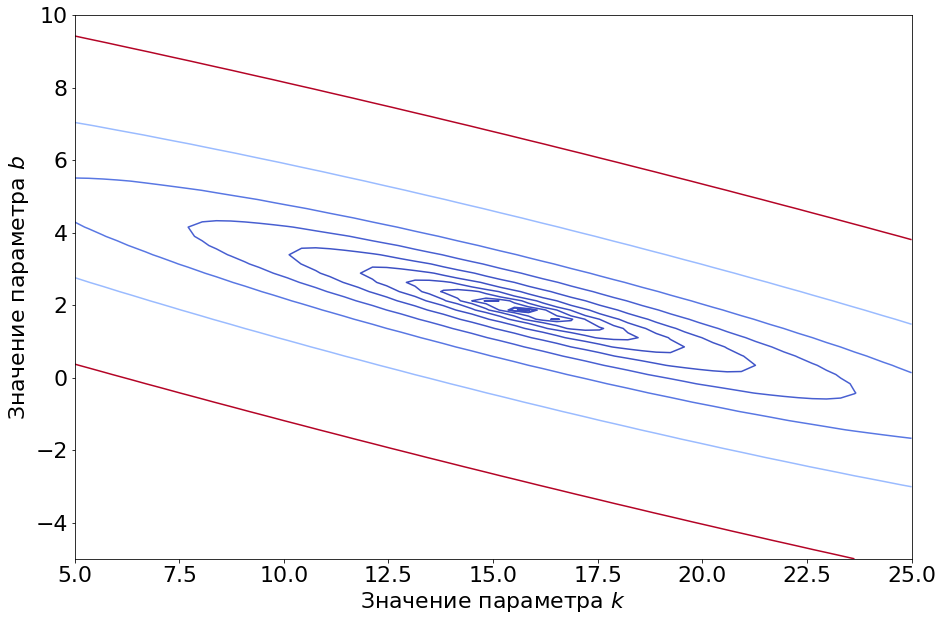

In [5]:
plot_linear_loss_in_3d_up(X, y)

У нас есть функция ошибки. Но теперь она от двух параметров. 

Для этого приведем понятие гардиента.

## Градиент

Градиент функции $\phi(x_0, x_1, \ldots x_N)$ от $N$ переменных это $N$ значений: 

$\dfrac{\delta \phi(x_0, x_1, \ldots x_N)}{\delta x_0}, \dfrac{\delta \phi(x_0, x_1, \ldots x_N)}{\delta x_1}, \ldots \dfrac{\delta \phi(x_0, x_1, \ldots x_N)}{\delta x_N}$

Обозначается как $grad (\phi)$ или  $\nabla \phi$

Например, градиент функции $\phi(x, y)$  от двух переменных это:

$grad (\phi) = \nabla \phi = \left[\dfrac{\delta \phi(x, y)}{\delta x}; \dfrac{\delta \phi(x, y)}{\delta y} \right]$

Эти значения можно считать координатами вектора (в декартовой системе координат) и их можно записать как: 

$grad (\phi) = \nabla \phi = \dfrac{\delta \phi(x, y)}{\delta x} \cdot \overleftarrow{i} + \dfrac{\delta \phi(x, y)}{\delta y} \cdot \overleftarrow{j}$

$\dfrac{\delta \phi(x, y)}{\delta x}$ - это *частная* производная по $x$.

$\dfrac{\delta \phi(x, y)}{\delta y}$ - это частная производная по $y$.

Частная производная - это производная по какой-либо переменной, например $x$, где остальные переменные мы считаем константой.

### Пример вычисления градиента

$\phi(x, y) = (1.5x + 2.5)^2 + 2.5y^2 + 0.5$

$\dfrac{\delta \phi(x, y)}{\delta x} =
\dfrac{\delta (1.5x + 2.5)^2 }{\delta x} +
\dfrac{\delta (2.5y^2)  }{\delta x} +
\dfrac{\delta (0.5) }{\delta x}
= 1.5 \cdot 2(1.5x + 2.5) + 0 + 0= 4.5x + 7.5$

 

$\dfrac{\delta \phi(x, y)}{\delta y} =
\dfrac{\delta (x + 1.5)^2 }{\delta y} +
\dfrac{\delta (2.5y^2)  }{\delta y} +
\dfrac{\delta (0.5) }{\delta y}
= 0 + 2 \cdot 2.5y + 0= 5y$

Давайте визуализируем  функцию $\phi(x, y) = (x + 1.5)^2 + 2.5y^2 + 0.5$.

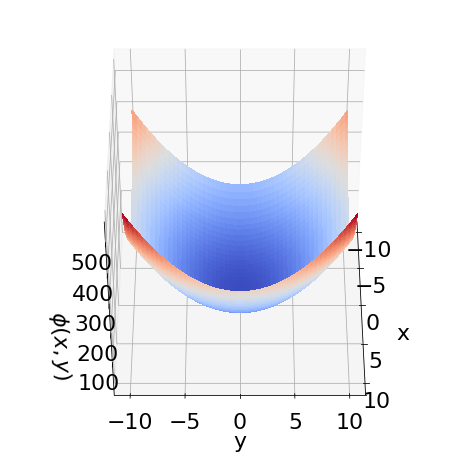

In [6]:
plot_function_in_3d(45, 0)

Рассмотрим ее сверху.

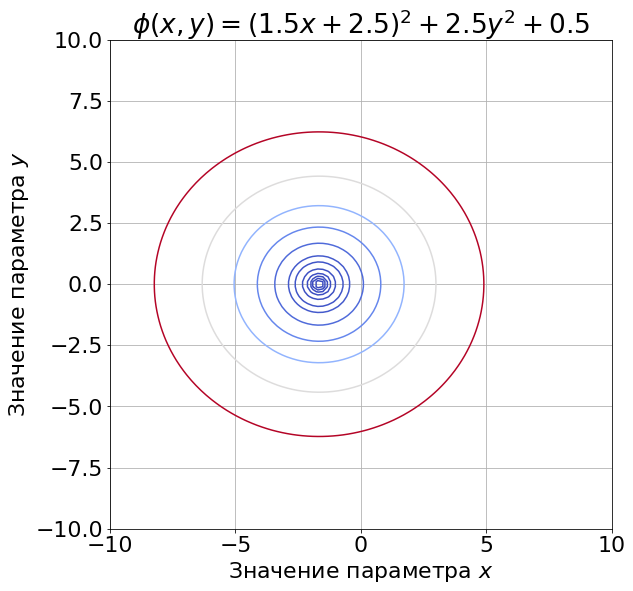

In [7]:
plot_3d_func_with_grad()

$\dfrac{\delta \phi(x, y)}{\delta x} = 4.5x + 7.5$

$\dfrac{\delta \phi(x, y)}{\delta y} = 5y$

Градиент из точки это вектор с началом из этой точки, который направленный в сторону **от** минимума.

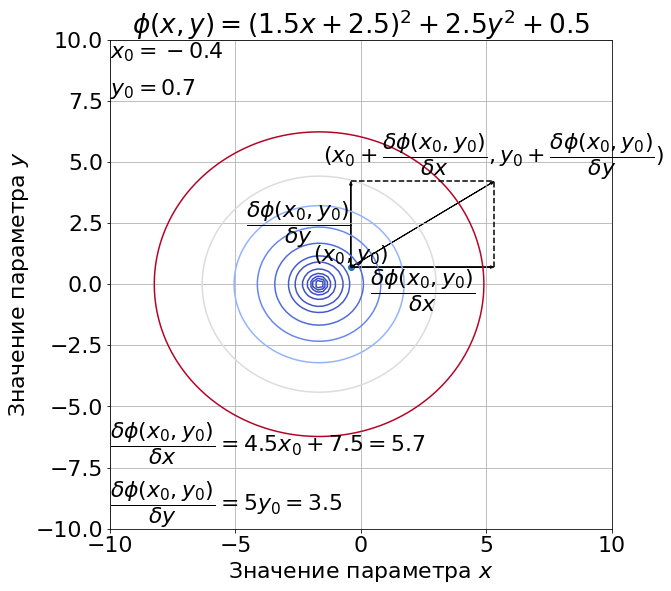

In [8]:
plot_3d_func_with_grad(x0=-0.4, y0=0.7, pos_neg_grad='positive')

И если мы возьмем отрицательный градиент (антиградиент), то этот вектор будет направлен **в** сторону минимума.

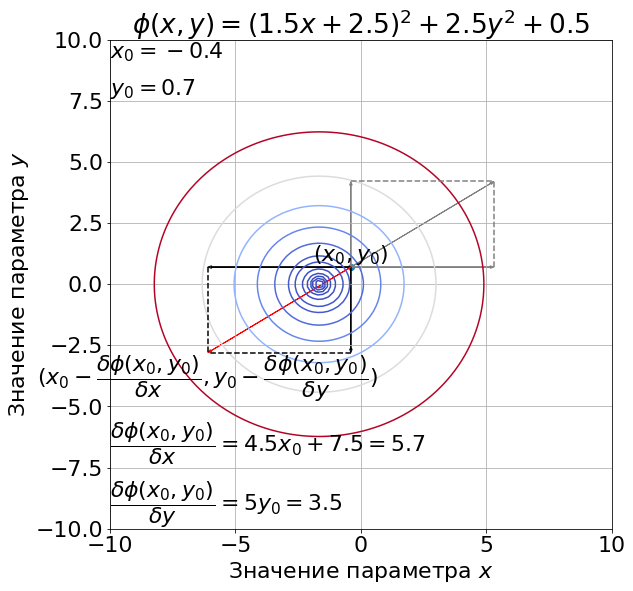

In [9]:
plot_3d_func_with_grad(x0=-0.4, y0=0.7, pos_neg_grad='negative')

## Градиент функции ошибки

$Loss(k, b) = \dfrac{1}{N}\sum_{i=1}^{N}{(\hat{y_i} - y_i)^2}= \dfrac{1}{N} \sum_{i=1}^{N}{( (k X + b)  - y_i)^2}$

$\dfrac{\delta  Loss(k, b)}{\delta b} = \left(\dfrac{1}{N} \sum_{i=1}^{N} ((k X_i + b)  - y_i)^2 \right)'_b$ 

$\dfrac{\delta  Loss(k, b)}{\delta b} = \dfrac{1}{N} \sum_{i=1}^{N} \left(((k X_i + b)  - y_i)^2 \right)'_b$ 

$\dfrac{\delta  Loss(k, b)}{\delta b} = \dfrac{1}{N} \sum_{i=1}^{N} 2((k X_i + b)  - y_i)\dfrac{\delta ((k X_i + b)  - y_i) }{\delta b}$ 

$\dfrac{\delta  Loss(k, b)}{\delta b} = \dfrac{2}{N} \sum_{i=1}^{N} ((k X_i + b)  - y_i)( 0 + 1 + 0)$ 

$\dfrac{\delta  Loss(k, b)}{\delta b} = \dfrac{2}{N} \sum_{i=1}^{N} ((k X_i + b)  - y_i)$ 

$\dfrac{\delta  Loss(k, b)}{\delta k} = \left(\dfrac{1}{N} \sum_{i=1}^{N} ((k X_i + b)  - y_i)^2 \right)'_k$ 

$\dfrac{\delta  Loss(k, b)}{\delta k} = \dfrac{1}{N} \sum_{i=1}^{N} 2((k X_i + b)  - y_i)\dfrac{\delta ((k X_i + b)  - y_i) }{\delta k}$ 

$\dfrac{\delta  Loss(k, b)}{\delta k} = \dfrac{2}{N} \sum_{i=1}^{N} ((k X_i + b)  - y_i)( X_i + 0 + 0)$ 

$\dfrac{\delta  Loss(k, b)}{\delta k} = \dfrac{2}{N}\sum_{i=1}^{N} ((k X_i + b)  - y_i)X_i$ 

$\nabla Loss(k, b) = \left[\dfrac{\delta  Loss(k, b)}{\delta k} ; \dfrac{\delta  Loss(k, b)}{\delta b} \right]$

$\nabla Loss(k, b) = \left[\dfrac{2}{N} \sum_{i=1}^{N} ((k X_i + b)  - y_i)X_i ; \dfrac{2}{N}\sum_{i=1}^{N} ((k X_i + b)  - y_i) \right]$

## Алгоритм градиентного спуска

* Выбираем случайное значение для $k$ и $b$
* Повторяем $iter$ раз:

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $b_{new} = b  - \alpha \cdot \dfrac{\delta Loss(k, b)}{\delta b} $ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{new} = k - \alpha \cdot \dfrac{\delta Loss(k, b)}{\delta k} $ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $b = b_{new}$, 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $k = k_{new}$
    

где $\alpha$ это коэффициент обучения.

## Визуализация градиентного спуска

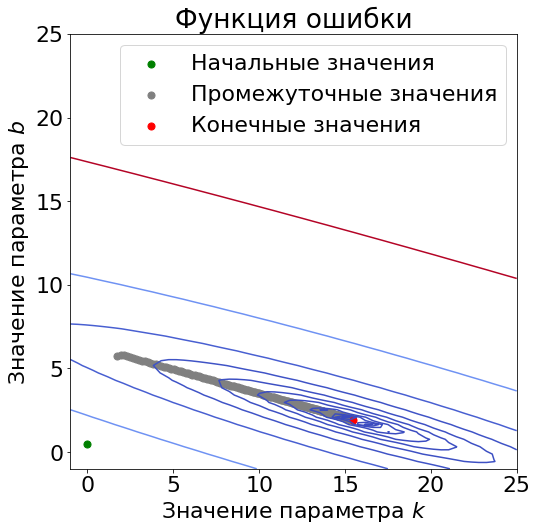

In [10]:
k_gd, b_gd = plot_gradient_descent_in_3d(X, y, iters=300, alpha=0.45)

In [11]:
print(f"Значение функции ошибки после обучения {linearn_loss_function(X, y, k_gd, b_gd)}")

Значение функции ошибки после обучения 0.23464960386571515


## Визуализация результата

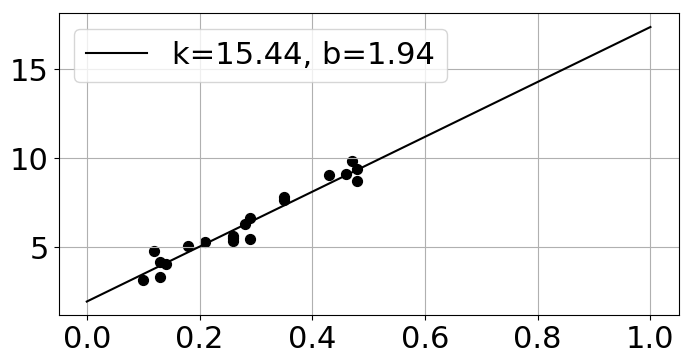

In [12]:
plot_data_and_hyp_with_bias(X, y, k_gd, b_gd)

## Градиентный спуск в деталях

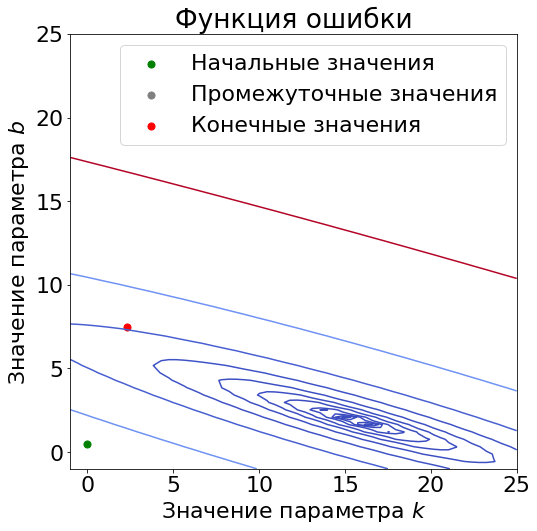

In [13]:
k_gd, b_gd = plot_gradient_descent_in_3d(X, y, iters=1, alpha=0.6)

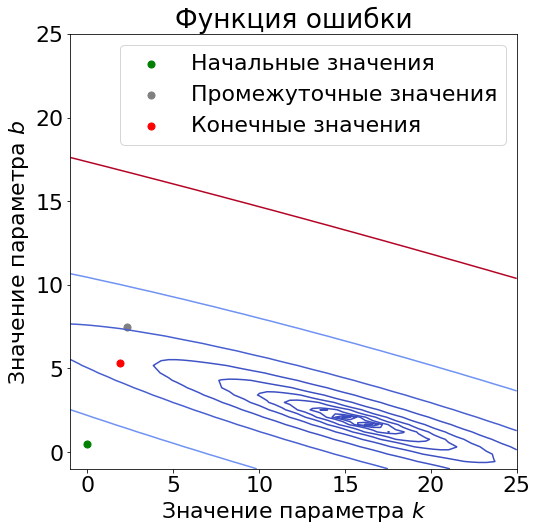

In [14]:
k_gd, b_gd = plot_gradient_descent_in_3d(X, y, iters=2, alpha=0.6)

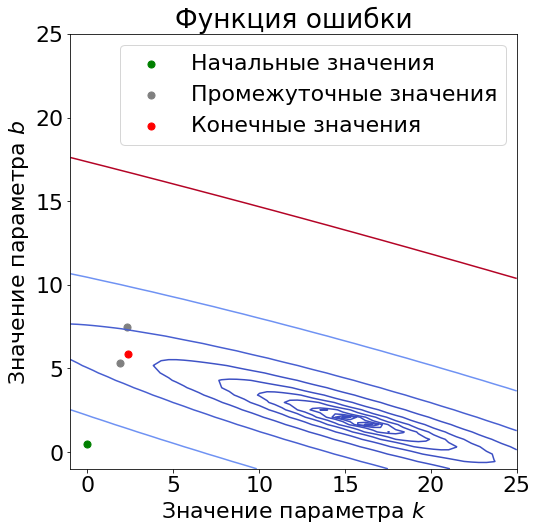

In [15]:
k_gd, b_gd = plot_gradient_descent_in_3d(X, y, iters=3, alpha=0.6)

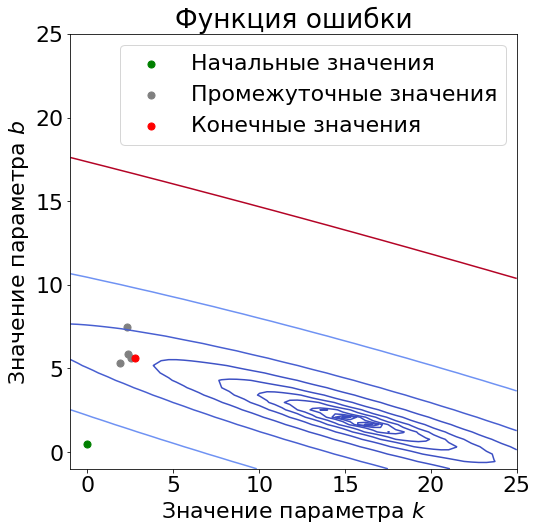

In [16]:
k_gd, b_gd = plot_gradient_descent_in_3d(X, y, iters=5, alpha=0.6)

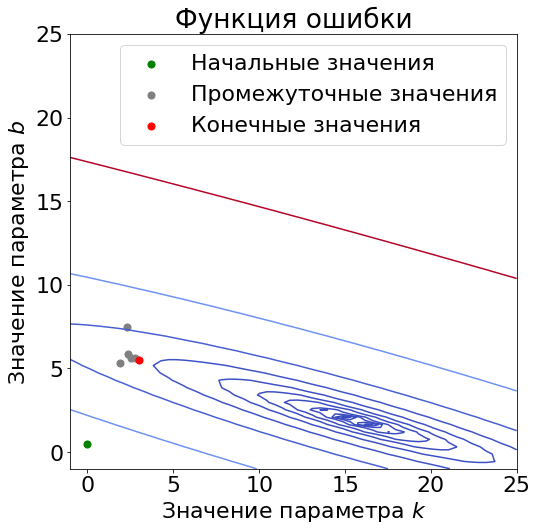

In [17]:
k_gd, b_gd = plot_gradient_descent_in_3d(X, y, iters=6, alpha=0.6)

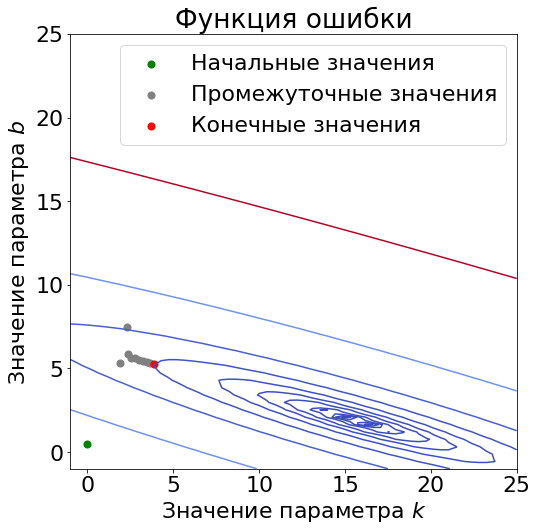

In [18]:
k_gd, b_gd = plot_gradient_descent_in_3d(X, y, iters=10, alpha=0.6)

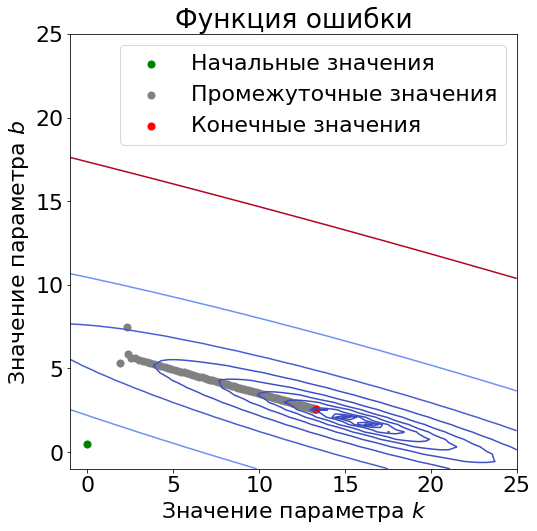

In [19]:
k_gd, b_gd = plot_gradient_descent_in_3d(X, y, iters=100, alpha=0.6)

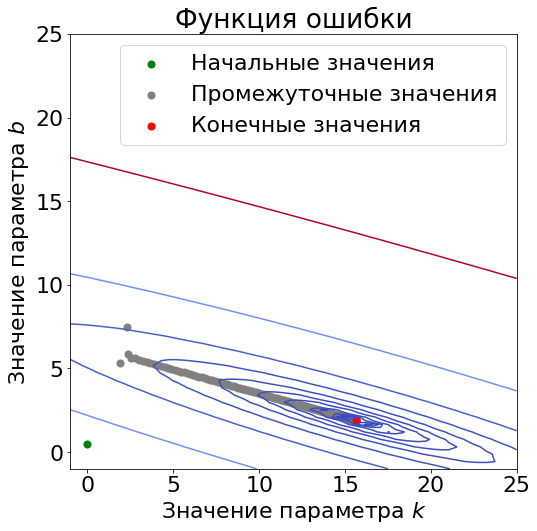

In [20]:
k_gd, b_gd = plot_gradient_descent_in_3d(X, y, iters=300, alpha=0.6)

### Приминение sklearn для решения задачи линейной регресии

In [21]:
from sklearn.linear_model import LinearRegression

# создаем объект линейной регрессии. 
lr = LinearRegression()

# до этого мы создавали его так LinearRegression(fit_intercept=False)
# этот параметр отвечал за вид функции 
# при fit_intercept=False используется функция f(x) = kx
# если не указывать этот параметр, то используется функция f(x) = kx + b

# обучаем нашу модель
lr.fit(X.reshape(-1, 1), y.reshape(-1, 1))

# И получаем значение коэффициентов
k_sklearn = lr.coef_[0, 0]
b_sklearn= lr.intercept_[0]

In [22]:
print(f"Значения коэффициентов k={k_sklearn} и b={b_sklearn}")

Значения коэффициентов k=15.692789281745474 и b=1.8690942386251583


In [23]:
print(f"Значение функции ошибки после обучения {linearn_loss_function(X, y, k_sklearn, b_sklearn)}")

Значение функции ошибки после обучения 0.233608517005525


In [24]:
print(f"Значение коэффициентов после градиентного спуска k={k_gd}, b={b_gd},  ")
print(f"Значение коэффициентов посчитанное с помощью skealrn k={k_sklearn}, b={b_sklearn}")

Значение коэффициентов после градиентного спуска k=15.626646069181716, b=1.8881269143137829,  
Значение коэффициентов посчитанное с помощью skealrn k=15.692789281745474, b=1.8690942386251583


In [25]:
print(f"Абсолютная разница между параметрами k: {abs(k_gd - k_sklearn)}")

Абсолютная разница между параметрами k: 0.06614321256375888


In [26]:
print(f"Абсолютная разница между параметрами b: {abs(b_gd - b_sklearn)}")

Абсолютная разница между параметрами b: 0.019032675688624545


In [27]:
print(f"Абсолютная разница ошибок {linearn_loss_function(X, y, k_gd, b_gd) - linearn_loss_function(X, y, k_sklearn, b_sklearn)}")

Абсолютная разница ошибок 6.99585795120028e-05


# Чему мы научились

* Линейная функция

* Функция потерь

* Производная

* Градиентный спуск

* Применение регрессии из sklearn

## Домашнее задание

Реализация градиентного спуска для функции вида: $f(X) = kX + b$

# Что дальше

* Что если наша целевая функция зависит от нескольких параметров?

* Что если нам нужно создать "кривую" функцию?

* Что такое нормализация данных

* Недообучение и переобучение

* Средняя абсолютная ошибка